## Leonard N. Stern School of Business
## New York University
## Data Bootcamp
## Fall 2017

<h1><center>The US Student Debt Crisis</center></h1>


<div class="inline-block"> <img src="http://www.alt-market.com/images/stories/student_debt.jpg" style="width: 300px;"/> </div> 

**Author: Samyak Jain**

**Email: [samyak.jain@stern.nyu.edu](samyak.jain@stern.nyu.edu)**

<center>**Introduction**</center>

According to the most recent data from the Federal Reserve Bank of New York, total student debt now tops $1.3 trillion. It is the single fastest-growing segment of U.S. consumer debt, increasing by 170 percent over the past decade. Some 44 million Americans currently hold student debt – and 8 million of those have already defaulted on their loans.  *(US News.com)*

Why has the student debt crisis come to the forefront recently?
Recent news coverage and the sheer amount of debt demand that one explore the factors that have contrbuted to this. It is also important to note that student debt is the only kind that cannot be removed through bankruptcy. The human capital cost of this could be phenomenal in the long run, leaving a dark and heavy impact on the American society and economy. 

Our goal here is to highlight changes in student debt levels across different parameters and then to try to explain why those changes occured. 

The project uses College Scorecard data provided through the US Department of Education to document and understand the student debt crisis. It is divided into the following parts: 

1. Data Report
2. Packages and Tools: A Discussion
3. Analysis 
4. Conclusion



<center>**Data Report**</center>
The key elements of this data are obtained through the College Scorecard Program maintained by the US Department of the Education. The program was "designed to increase transparency, putting the power in the hands of the public — from those choosing colleges to those improving college quality — to see how well different schools are serving their students"-*US Department of Education*

The College Scorecard website along with all the relevant data can be accessed at https://collegescorecard.ed.gov/data/

Firstly, the complete dataset is available as a .zip file. It includes over 1700 variables for over 7000 different US universities beginning in 1996. There are multiple csv files corresponding to each year academic year: 1996-97, 2000-01 and so on. 

I'm going to only focus on three of the datasets and a few key variables to see how student debt has evolved since 2005. This was done for a variety of reasons: 

1. A lot of datapoints for the variables are privacy suppressed
2. The dataset was missing data points for earlier years
3. Focusing on the data available post 2005 allows us to specifically look at how events during that time, namely the financial crisis of 2008, had an impact on US student debt. 


- CollegeScorecard_Raw_Data/MERGED2005_06_PP.csv is the csv file corresponding to the academic year of 2005-06
- CollegeScorecard_Raw_Data/MERGED2010_11_PP.csv is the csv file corresponding to the academic year of 2010-11
- ColegeScorecard_Raw_Data/MERGED2015-16_PP.csv is the csv file corresponding to the academic year of 2005-06

Each of these files contains the followng variables for the respective years: 

- The Name of institution

- Cumulative median debt per student across the 7000 universities. This is further grouped by income to illustrate how debt levels differ across different income levels. This is the **main variable of interest**

- Region: The dataset divides the US into 9 regions which include the 50 states. Here's what each integer corresponds to

1	New England (CT, ME, MA, NH, RI, VT)

2	Mid East (DE, DC, MD, NJ, NY, PA)

3	Great Lakes (IL, IN, MI, OH, WI)

4	Plains (IA, KS, MN, MO, NE, ND, SD)

5	Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)

6	Southwest (AZ, NM, OK, TX)

7	Rocky Mountains (CO, ID, MT, UT, WY)

8	Far West (AK, CA, HI, NV, OR, WA)

9	Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)

- Completion rate: The Percent of students who obtained a higher education degree within 4 years

- Tuition: The cost of attending the college for out of state students. This is supposed to be more representative of the actual cost of attendance since a large number of colleges see the majority of their student bodies come from out of the state. 



<center>**Packages**</center>

In the analysis below, I'm goint to use the following packages:
- display     :Helps present output
- Pandas      :core tool to import, manipulate, merge, and analyze the data
- Matplotlib  :Used to plot graphs 
- numpy       :enables us to perform specfic mathematical computations and transoformations
- Basemap     :Mapping package 
- statsmodels :Basic statistical analysis package for regression analysis 
- geopandas   :Creates dataframe like objects with shapes (see below) to produce maps.
- shapely     :which helps create shapes 
- fiona       :Required 

In [143]:
# We start by importing the packages we need, like Pandas.

%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import zipfile
from IPython.display import display, Image  
import numpy as np 
import statsmodels.api as sm
import statsmodels.formula.api as smf

matplotlib.style.use(['seaborn-talk','seaborn-ticks','seaborn-whitegrid'])
plt.rcParams['figure.figsize'] = (15,5)

**Downloading our data and saving it locally**

As mentioned before the data can be downloaded as a .zip file. This complicates matters since we would have to first download the zip file, extract the .csv files we require and then import those. Luckily there is a package for this. We Download our data directory from the website and save it as collegedata.zip

*Note that this may take a bit of time depending on the quality of your interent connecion*


In [144]:
!curl -L 'https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data.zip' -o collegedata.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  234M  100  234M    0     0  1080k      0  0:03:42  0:03:42 --:--:-- 2010k  0   896k      0  0:04:27  0:00:34  0:03:53  799k   0     0   910k      0  0:04:23  0:00:40  0:03:43  991k     0  0:03:40  0:01:24  0:02:16 1217k     0  1067k      0  0:03:44  0:03:00  0:00:44  935k3  194M    0     0  1059k      0  0:03:46  0:03:08  0:00:38  949k   0  1069k      0  0:03:44  0:03:34  0:00:10  432k


**Unzipping our data**

Our data is downloaded in zip format. We use the "Zipfile" plugin to extract it. 

In [145]:
with zipfile.ZipFile("collegedata.zip","r") as z1:
    z1.extractall()

**Using Pandas to create our DataFrames**

We use Pandas to read data from the new ZIP directory and import the three csv files for the academic years of 2005-06, 2010-11, and 2015-16

In [146]:
df2005_06 = pd.read_csv("CollegeScorecard_Raw_Data/MERGED2005_06_PP.csv",low_memory=False)
df2010_11 = pd.read_csv("CollegeScorecard_Raw_Data/MERGED2010_11_PP.csv",low_memory=False)
df2015_16 = pd.read_csv("CollegeScorecard_Raw_Data/MERGED2015_16_PP.csv",low_memory=False)

We check the size of the data to make sure we've downloaded the right data sets 

In [149]:
# We check the size of my data to make sure we have downloaded the right datasets
print ("The shape of DataFrame 2005_06 is", df2005_06.shape,"rows and columns")
print ("The shape of DataFrame 2010_11 is",df2010_11.shape,"rows and columns")
print ("The shape of DataFrame 2015_16 is", df2015_16.shape,"rows and columns")

The shape of DataFrame 2005_06 is (6824, 1805) rows and columns
The shape of DataFrame 2010_11 is (7414, 1805) rows and columns
The shape of DataFrame 2015_16 is (7593, 1805) rows and columns


Note that the number of rows differ across the three different dataframes. This can be attributed to new colleges opening over time. Therefore, approximately 590 colleges opened from 2005-06 to 2010-11 while  approximately 179 of them opened betweem 2015-16. 

**Extracting Variables** 

The US Department of Education provide a comprehensive guide to their data in the form of a Data Dictionary that can be accessed [here](https://collegescorecard.ed.gov/assets/CollegeScorecardDataDictionary.xlsx)

This contains an overview of the 1777 different variables and the information they convey. Using this we identified the aforementioned variables we were intereste in.

In [150]:
var_list = ["DEBT_MDN","LO_INC_DEBT_MDN","MD_INC_DEBT_MDN","HI_INC_DEBT_MDN","REGION","INSTNM","CONTROL","COMP_ORIG_YR4_RT","TUITIONFEE_IN","TUITIONFEE_OUT"]
#specifies the variables i want from each dataset

In [151]:
data2005_06 = pd.DataFrame(df2005_06, columns = var_list)
data2010_11 = pd.DataFrame(df2010_11, columns = var_list)
data2015_16 = pd.DataFrame(df2015_16, columns = var_list)
#Creates new dataframes for each year with the relevant variables 

As mentioned before a lot of the data is privacy suppressed or missing due to differing reporting standards and requirements amongst universities. Thus, we dropped universities that did not report any data corresponding to these variables. 

In [152]:
data2005_06 = data2005_06.dropna(axis=0, how='all')
data2010_11 = data2010_11.dropna(axis=0, how='all')
data2015_16 = data2015_16.dropna(axis=0, how='all')

**Combining DataFrames**

Our Dataframes now contain the exact same number of variables. However these cannot be differentiated since the variables names are the same across each dataframe. We change this by adding a new variable: "Year" to each dataframe that helps us identify which time period each data point corresponds to. 

In [153]:
data2005_06["Year"]="2005/2006"
data2010_11["Year"]="2010/2011"
data2015_16["Year"]="2015/2016"

Here is where things get interesting. Instead of combining the dataframes horizontally, we decided to use the Concat function to stack them on top of each other and create one big dataframe. This avoids the extra step of re-labelling each variable to indicate which year it corresponds to. 

In [154]:
combineddata = pd.concat([data2005_06,data2010_11,data2015_16],axis=0)

We confirm that the combined dataframe has been created and reports no errors

In [155]:
print (combineddata.head())
print (combineddata.tail())

  DEBT_MDN LO_INC_DEBT_MDN MD_INC_DEBT_MDN HI_INC_DEBT_MDN  REGION  \
0     6625          6901.5            6625            5257       5   
1     5500            5500            5250            5000       5   
2     6625            5500            9937           11982       5   
3     5986            6500          6055.5            5500       5   
4     6625            6625            6625            6625       5   

                                INSTNM  CONTROL COMP_ORIG_YR4_RT  \
0             Alabama A & M University        1      0.234889059   
1  University of Alabama at Birmingham        1      0.255566312   
2                   Amridge University        2      0.335365854   
3  University of Alabama in Huntsville        1      0.290868095   
4             Alabama State University        1      0.172653534   

   TUITIONFEE_IN  TUITIONFEE_OUT       Year  
0         4420.0          8320.0  2005/2006  
1         4792.0         10732.0  2005/2006  
2        10400.0         10400.0

**Renaming columns**

It is obvious that our column names are uninformative and confusing. Therefore we rename them to make them easier to interpret

In [164]:
combineddata = combineddata.rename(columns={"DEBT_MDN":"Median Debt","LO_INC_DEBT_MDN":"Median Debt Income <30k","MD_INC_DEBT_MDN":"Median Debt Income 30-75K","HI_INC_DEBT_MDN":"Median Debt Income >75K","INSTNM":"School Name","CONTROL":"Institution Type","COMP_ORIG_YR4_RT":"Completion Rate","TUITIONFEE_IN":"Tuition In-state","TUITIONFEE_OUT":"Tuition Out-of-State"})

In [165]:
combineddata

,Median Debt,Median Debt Income <30k,Median Debt Income 30-75K,Median Debt Income >75K,REGION,School Name,Institution Type,Completion Rate,Tuition In-state,Tuition Out-of-State,Year
0,6625,6901.5,6625.0,5257.0,5,Alabama A & M University,1,0.234889059,4420,8320,2005/2006
1,5500,5500.0,5250.0,5000.0,5,University of Alabama at Birmingham,1,0.255566312,4792,10732,2005/2006
2,6625,5500.0,9937.0,11982.0,5,Amridge University,2,0.335365854,10400,10400,2005/2006
3,5986,6500.0,6055.5,5500.0,5,University of Alabama in Huntsville,1,0.290868095,4688,9886,2005/2006
4,6625,6625.0,6625.0,6625.0,5,Alabama State University,1,0.172653534,4008,8016,2005/2006
5,10373,10500.0,10645.0,8250.0,5,The University of Alabama,1,0.466666667,4864,13516,2005/2006
6,3313,3500.0,2961.5,2625.0,5,Central Alabama Community College,1,0.031055901,2340,4830,2005/2006
7,10466.5,10083.0,10500.0,9166.0,5,Athens State University,1,0.445993031,NULL,NULL,2005/2006
8,5409,5500.0,5250.0,4812.0,5,Auburn University at Montgomery,1,0.276302852,4640,13460,2005/2006
9,10500,10125.0,11000.0,9625.0,5,Auburn University,1,0.376895307,5278,14878,2005/2006


**Replacing irrelavant/missing values**
You will notice that we still have data missing or suppressed. We replace them with "Null" values since matplotlib and pandas don't include these in their computations. 

In [166]:
combineddata = combineddata.replace("PrivacySuppressed","NULL")
combinedata = combineddata.replace(" ", np.NaN)

#df.replace(r'', np.NaN)

combineddata = combineddata.fillna("NULL")

In [167]:
# We take a quick glance to make sure our dataframe is still working
combineddata 

,Median Debt,Median Debt Income <30k,Median Debt Income 30-75K,Median Debt Income >75K,REGION,School Name,Institution Type,Completion Rate,Tuition In-state,Tuition Out-of-State,Year
0,6625,6901.5,6625.0,5257.0,5,Alabama A & M University,1,0.234889059,4420,8320,2005/2006
1,5500,5500.0,5250.0,5000.0,5,University of Alabama at Birmingham,1,0.255566312,4792,10732,2005/2006
2,6625,5500.0,9937.0,11982.0,5,Amridge University,2,0.335365854,10400,10400,2005/2006
3,5986,6500.0,6055.5,5500.0,5,University of Alabama in Huntsville,1,0.290868095,4688,9886,2005/2006
4,6625,6625.0,6625.0,6625.0,5,Alabama State University,1,0.172653534,4008,8016,2005/2006
5,10373,10500.0,10645.0,8250.0,5,The University of Alabama,1,0.466666667,4864,13516,2005/2006
6,3313,3500.0,2961.5,2625.0,5,Central Alabama Community College,1,0.031055901,2340,4830,2005/2006
7,10466.5,10083.0,10500.0,9166.0,5,Athens State University,1,0.445993031,NULL,NULL,2005/2006
8,5409,5500.0,5250.0,4812.0,5,Auburn University at Montgomery,1,0.276302852,4640,13460,2005/2006
9,10500,10125.0,11000.0,9625.0,5,Auburn University,1,0.376895307,5278,14878,2005/2006


<center>**Analysis**</center>

**Graph 1**
This plot is meant to highlihght the growth of the level of debt that a student is left with after graduation. These variables are obviously positively correlated and this is reflected in the strong upward trend for both tuition costs and debt levels across time. 

We observe median debt rising over tuition costs post 2010. This can be explained by the crisis of 2008. The college industry seemed to be extremely attractive in the years leading up to 2008 as students had easy access to debt to finance their college expenditure, thus incentivizing a lot of producers to enter the industry. We would expect tuitions to go down on average in this case, but this is clearly not the case and should be further investigated. Post the 08' crisis, the number of people unable to pay their student loans must have undoubtedly gone up post the crisis, resulting in a loss of faith in the US education system and reflecting a decreased demand for higher education. This reflected in the fact that median debt rose over tuition costs between 2010-11 and 2015-16. 

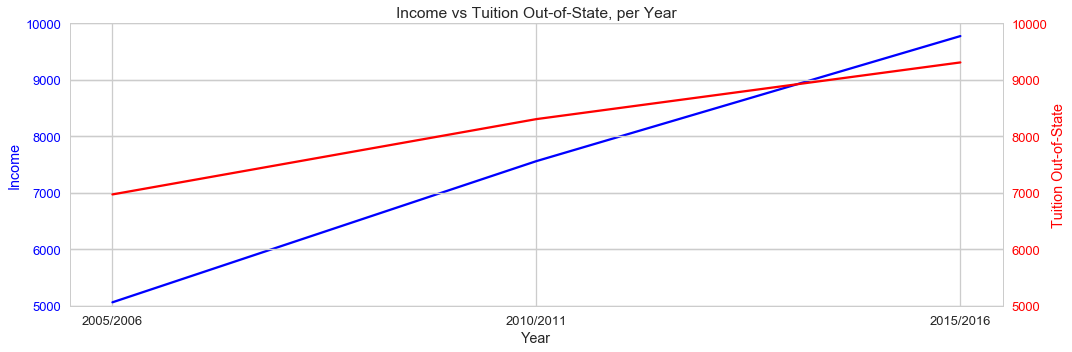

In [168]:
subData = combineddata[['Median Debt', 'Tuition Out-of-State', 'Year']].copy(deep=True)
subData['Median Debt'] = subData['Median Debt'].replace('NULL', 1)
subData['Tuition Out-of-State'] = subData['Tuition Out-of-State'].replace('NULL', 0)
subData['Median Debt'] = pd.to_numeric(subData['Median Debt'])
subData['Tuition Out-of-State'] = pd.to_numeric(subData['Tuition Out-of-State'])
subData = subData.groupby('Year').mean()

fig, ax1 = plt.subplots()
t = [0,1,2]
ax1.plot(t, subData['Median Debt'], 'b-')
ax1.set_xlabel('Year')
ax1.set_ylabel('Income', color='b')
ax1.tick_params('y', colors='b')
ax1.set_ylim(5000, 10000)

ax2 = ax1.twinx()
ax2.plot(t, subData['Tuition Out-of-State'], 'r-')
ax2.set_ylabel('Tuition Out-of-State', color='r')
ax2.tick_params('y', colors='r')
ax2.set_xticks([0, 1, 2])
ax2.set_xticklabels(['2005/2006', '2010/2011', '2015/2016'])
ax2.set_ylim(5000, 10000)
ax2.set_title('Income vs Tuition Out-of-State, per Year')

fig.tight_layout()
plt.show()

**Graph 2**

As mentioned before, we would expect to see tuition costs decreasing from 2005-06 which is why decided to investigate how tuition costs changed across different types of universities. 

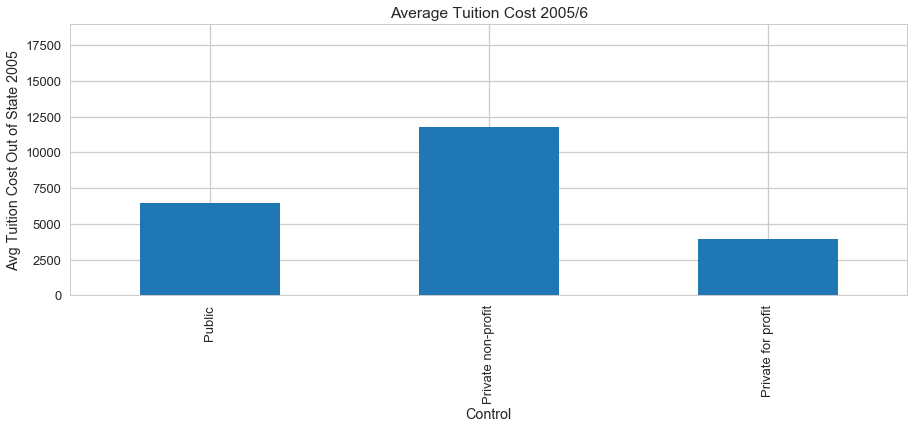

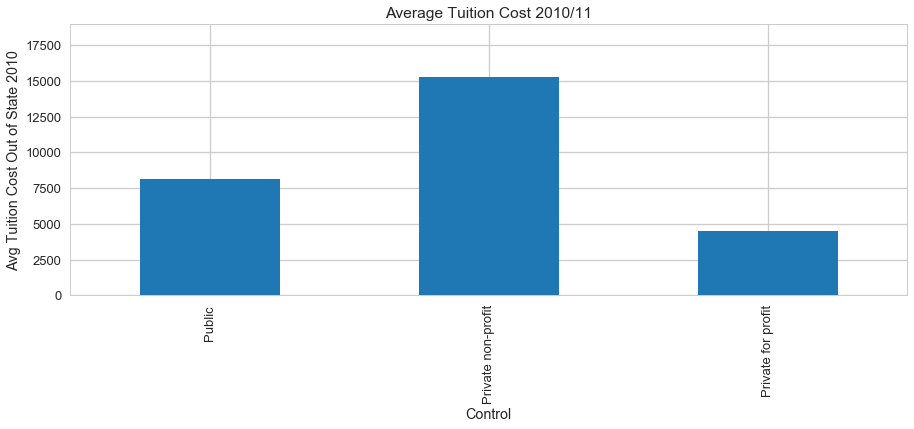

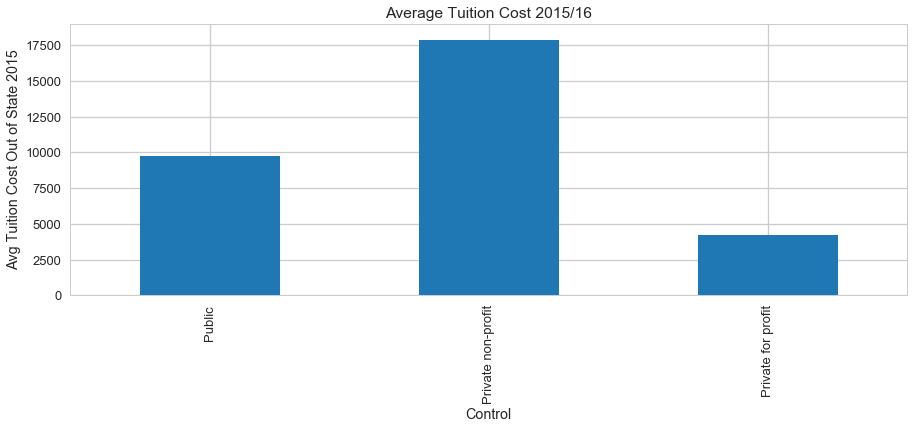

In [169]:
tuition2005 = combineddata.loc[combineddata['Year'] == '2005/2006']
tuition2010 = combineddata.loc[combineddata['Year'] == '2010/2011']
tuition2015 = combineddata.loc[combineddata['Year'] == '2015/2016']

tuition2005 = tuition2005[['Institution Type', 'Tuition Out-of-State']]
tuition2010 = tuition2010[['Institution Type', 'Tuition Out-of-State']]
tuition2015 = tuition2015[['Institution Type', 'Tuition Out-of-State']]

tuition2005['Tuition Out-of-State'] = tuition2005['Tuition Out-of-State'].replace('NULL', 0)
tuition2010['Tuition Out-of-State'] = tuition2010['Tuition Out-of-State'].replace('NULL', 0)
tuition2015['Tuition Out-of-State'] = tuition2015['Tuition Out-of-State'].replace('NULL', 0)

tuition2005['Tuition Out-of-State'] = pd.to_numeric(tuition2005['Tuition Out-of-State'])
tuition2010['Tuition Out-of-State'] = pd.to_numeric(tuition2010['Tuition Out-of-State'])
tuition2015['Tuition Out-of-State'] = pd.to_numeric(tuition2015['Tuition Out-of-State'])

tuition2005 = tuition2005.groupby('Institution Type').mean()
tuition2010 = tuition2010.groupby('Institution Type').mean()
tuition2015 = tuition2015.groupby('Institution Type').mean()

ax2005 = tuition2005.plot(kind='bar', title='Average Tuition Cost 2005/6', legend=False)
ax2005.set_xlabel('Control')
ax2005.set_ylabel('Avg Tuition Cost Out of State 2005')
ax2005.set_xticklabels(['Public', 'Private non-profit', 'Private for profit'])
plt.ylim(0, 19000)

ax2010 = tuition2010.plot(kind='bar', title='Average Tuition Cost 2010/11', legend=False)
ax2010.set_xlabel('Control')
ax2010.set_ylabel('Avg Tuition Cost Out of State 2010')
ax2010.set_xticklabels(['Public', 'Private non-profit', 'Private for profit'])
plt.ylim(0, 19000)

ax2015 = tuition2015.plot(kind='bar', title='Average Tuition Cost 2015/16', legend=False)
ax2015.set_xlabel('Control')
ax2015.set_ylabel('Avg Tuition Cost Out of State 2015')
ax2015.set_xticklabels(['Public', 'Private non-profit', 'Private for profit'])
plt.ylim(0, 19000)

plt.show()

**Graph 2 Analysis**

Here we can clearly see that tuition costs have gone up across all institution types. What's interesting is that the increase in tuition costs for private non-profit universities was the biggest. We would expect to see tuition costs rising faster and a by a greater degree for private for profit universities. 

This can be explained policy changes. Beginning in 2012, the US government decided to increase the grant aid given to private non-profit universities, essentially incentivizing them to inflate tuition costs and accept as many students as possible.

**Graph 3**

The US Department of education also collects aggregate information on student's family income levels from universities.

Here we group students by family income to show how the cumulative median debt per student has increased over time. 

The income groups are: 

- Low: $0-30,000 per year

- Medium: $30,001 to 75,000 per year

- High: $75001+ per year

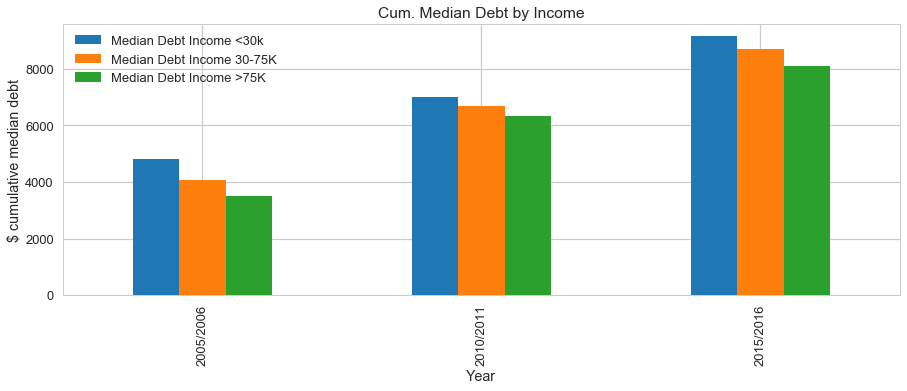

In [171]:
medDebtCol = pd.to_numeric(combineddata['Median Debt'].copy(deep = True).replace('NULL', 0))
yearCol = combineddata['Year'].copy(deep = True)

combineddata['Median Debt Income <30k'] = pd.to_numeric(combineddata['Median Debt Income <30k'].replace('NULL', 0))
combineddata['Median Debt Income 30-75K'] = pd.to_numeric(combineddata['Median Debt Income 30-75K'].replace('NULL', 0))
combineddata['Median Debt Income >75K'] = pd.to_numeric(combineddata['Median Debt Income >75K'].replace('NULL', 0))
avgIncome = combineddata[['Year', 'Median Debt Income <30k', 'Median Debt Income 30-75K', 'Median Debt Income >75K']].groupby('Year').mean()

ax = avgIncome.plot(kind='bar', title = 'Cum. Median Debt by Income')
ax.set_xlabel('Year')
ax.set_ylabel('$ cumulative median debt')

plt.show()

**Graph 3 Analysis**

Here we see the debt levels rise substantially all levels of income. Student's from low family income backgrounds i.e <30K seemed to graduate with the highest absolute level of debt and this has only been further compounded over time. Moreover, students from middle family income backgrounds saw the greatest increase in the amount of debt they would graudate with over 2005-06 to 2015-16

**Graph 4**


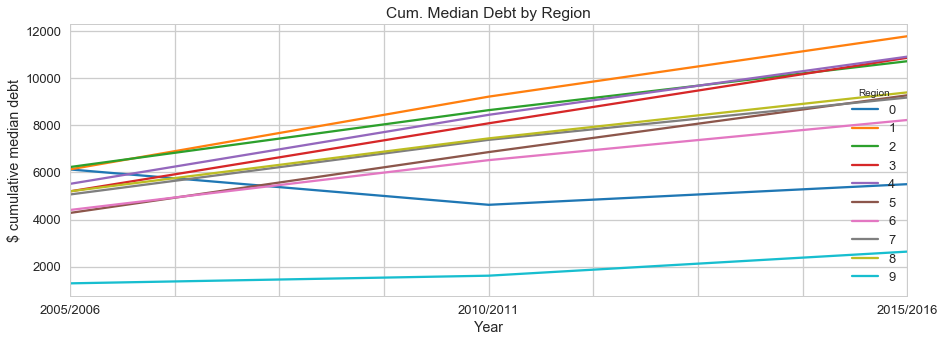

In [172]:
regionCol = combineddata['REGION'].copy(deep=True)
cumMedDebtByRegion = pd.DataFrame(data = { 'Median Debt': medDebtCol, 'Year': yearCol, 'Region': regionCol })
cumMedDebtByRegion = cumMedDebtByRegion.groupby(['Region', 'Year']).mean()
plot_df = cumMedDebtByRegion.unstack('Region').loc[:, 'Median Debt']
ax = plot_df.plot(kind='line', title = 'Cum. Median Debt by Region')
ax.set_xlabel('Year')
ax.set_ylabel('$ cumulative median debt')
plt.show()

**Graph 4 Analysis**
Here we see the level of cumulative median debt rising across all regions of the US except for US service schools which are normally military academies. This highlights just how widespread the student debt issue is across the US.

But we also significant differences in the absolute value of the debt across regions. For example, a student from New England graduates with almost $2500 more debt than a student from the Far West. These differences grow larger between more regions that vary a great deal between them. 

This could be explained by the variance in the quality of education across regions, which would affect tuition costs and hence the median student debt as well. 

<center>**Conclusion**</center>

Clearly, student debt in the US is a cause of great concern. This issue has largely been ignored by the new Presidency and seems to lag behind others in terms of awareness and exposure. US student debt levels are rising across parameters and it's only a while before the American people and economy have to confront this issue. 

I hope you found this project insightful and revealing. 

<center>**Thank you**</center>